
# Gene Mutation
## Decoding relationships between genes


## Overview
Gene Mutation is a prevailing and computationally intensive research topic in Genetics. For this assignment, assume that you have been hired by a biotechnology company to work on a gene mutation research project, and your first task is to write a Python program to investigate a genealogical mutation sequencing.


In this program, a gene is described by a string of letters, with a letter being chosen from the set ${A, C, G, T}$. A mutation is relatively rare but it can occur in which there is a small probability of either inserting a new character, deleting an existing character, or changing to a new character randomly. We can refer to these probabilities by $p_i, p_d$, and $p_c$, respectively.


Now, suppose the starting point is a given string that undergoes a mutation process. This mutation created two other strings, the child strings of the first string. Each of these two new strings can undergo mutations by which they will change from their parent. In turn, the two-child strings, mutate and create 2 new substrings each, resulting in four grandchild strings from the original gene sequencing string. We can easily visualize the sequence of mutations if we were to draw a genealogy binary tree relating strings to their parent and grandparent strings.

As a result of these mutations, we now have 7 strings but unfortunately, the order of the strings has been lost due to a glitch in the gene sequencing generation program. Therefore, your first task in the project is to recover the genealogy tree for the following set of 7 strings labelled with lowercase letters:
``` python
('a', 'AGTTATGTGTCAGAGCAAAAGATTCCTCATCTAGCGGTCGCAAGTCATTGCC'),
('b', 'AAGTTATTTGCTCACAGGGAACGAATCCAGCTCTGCGGTCGAGGCCACATTGCC'),
('c', 'AGTTATTTTCAGAGAAATGATTCCTTCTCACCGGTCGAGCCAGTGCC'),
('d', 'AGTTTATGTGTCAGAAGCAAAAGATTACTAATCTACGCGTCGCAAGGTCTATTCC'),
('e', 'ACAGCTTATATAGCTCATAGGGAGCGAAATCCAGCCCCGCGGTGCGAGGCCCCTTGTCGC'),
('f', 'AAGTATATGGCACGAGGGAACAGTATCAGCTCTTCGGATAAAGGCCACAGTGCC'),
('g', 'AGTTATGTGTCACAGGCAAAAGATCCTTCTCTGCGGTCGAACCCATTGCC')
```


Henceforth, the set of strings created with the gene-sequencing generation program will be referred to as `Set_Strings`.



## Longest Common Subsequence (LCS)

Write Python code which, given any two arbitrary strings, outputs the length of the Longest Common Subsequence (LCS) for those two strings. Make sure to include a number of test cases that demonstrate that your code is correct.

In [2]:
import numpy as np
def longest_common_subsequence(x, y):
    """
    Gives the length of the longest common substring between strings x and y
    
    Inputs:
    - x, y: strings
    """
    
    # list for lengths of LCS
    # c[i,j] store the length of LCS between x[:i] and y[:j] 
    c = np.zeros((len(x), len(y)))
    
    # if any string is empty, lcs length 0
    if(len(x) == 0 or len(y) == 0):
        return 0
    
    # for every letters in the string x,
    # check with every letter in string y
    for i in range(len(x)):
        for j in range(len(y)):
            # if the letters are same, lcs length increase by 1 
            # from the lcs length of x[:i-1] and y[:i-1]
            if x[i] == y[j]:
                if(i == 0  or j == 0):
                    c[i,j] = 1
                else:
                    c[i,j] = c[i-1, j-1] + 1
            
            # if not same, then the lcs length is the maximum
            # value between the upper value or left-side value of the table
            elif (c[i-1, j] >= c[i,j-1]):
                c[i,j] = c[i-1, j]
            else:
                c[i,j] = c[i, j-1]
    
    # the last cell, last row gives the lcs length for full x and y 
    return int(c[-1,-1])
    
    # raise NotImplementedError()

In [3]:
a = 'AGTTATGTGTCAGAGCAAAAGATTCCTCATCTAGCGGTCGCAAGTCATTGCC'
b = 'AAGTTATTTGCTCACAGGGAACGAATCCAGCTCTGCGGTCGAGGCCACATTGCC'

print(longest_common_subsequence(a,b))


40


In [4]:
assert longest_common_subsequence('ABCBDAB', 'BDCABA')==4
assert longest_common_subsequence('abc', '') == 0
assert longest_common_subsequence('abc', 'a') == 1
assert longest_common_subsequence('abc', 'ac') == 2

## Pair-wise LCS

How many LCSs are there in Set_Strings? Generate the matrix of the lengths of the LCS for every pair of strings in Set_Strings. Make sure that your matrix obeys the following properties:
1. The matrix should be cast as a two-dimensional numpy array.  **Store this 2D numpy array to a variable named `C`**.

2. Your 2D array `C` should have dimension (7,7) and `C[i,j]` should give the length of the LCS for the $i-$th and $j-$th strings. For example, `C[0,3]` gives the length of the LCS for string `a` and string `d`.

In [5]:
a = 'AGTTATGTGTCAGAGCAAAAGATTCCTCATCTAGCGGTCGCAAGTCATTGCC'
b = 'AAGTTATTTGCTCACAGGGAACGAATCCAGCTCTGCGGTCGAGGCCACATTGCC'
c = 'AGTTATTTTCAGAGAAATGATTCCTTCTCACCGGTCGAGCCAGTGCC'
d = 'AGTTTATGTGTCAGAAGCAAAAGATTACTAATCTACGCGTCGCAAGGTCTATTCC'
e = 'ACAGCTTATATAGCTCATAGGGAGCGAAATCCAGCCCCGCGGTGCGAGGCCCCTTGTCGC'
f = 'AAGTATATGGCACGAGGGAACAGTATCAGCTCTTCGGATAAAGGCCACAGTGCC'
g = 'AGTTATGTGTCACAGGCAAAAGATCCTTCTCTGCGGTCGAACCCATTGCC'

set_string = [a,b,c,d,e,f,g]

In [6]:
# number if gene
n_gene = len(set_string)

# initialize the lcs_matrix with 0
C = np.zeros((n_gene, n_gene), dtype = int)

for i in range(n_gene):
    
    # if the two pairs are same, lcs is simply the length of the string
    C[i,i] = len(set_string[i])
    
    
    # (x,y) and (y,x) are same pair, so no need to calculate 
    # every element. As the matrix will be symmetric we will calculate only the 
    # upper diagonal (i.e. range(i+1, n_gene)) and complete the lower diagonal accordingly
    for j in range(i+1, n_gene):
        
        #calculate and store the lcs length
        C[i,j]  = longest_common_subsequence(set_string[i],set_string[j])
        C[j,i] = C[i,j]

print(C)

[[52 40 41 48 39 38 45]
 [40 54 38 38 47 44 43]
 [41 38 47 39 36 36 39]
 [48 38 39 55 38 37 42]
 [39 47 36 38 60 39 40]
 [38 44 36 37 39 54 40]
 [45 43 39 42 40 40 50]]


In [7]:
# testing

print(longest_common_subsequence(a,d))
print(C[0,3])

48
48


## Genealogical Relationships

Manually examine the matrix you obtained above, and infer the genealogical relationships between strings (i.e., explicitly identify the great-grandparent, grandparent, parent and child strings) using **at least** two strategies: one that  is **local** and another that is **global**. A local strategy infers the location of a particular string in the tree based on a property (of your choice) of the node itself. A global strategy infers the whole tree based on a metric obtained by considering all the relationships involved in that tree at once. You may need to research what a good metric could be to describe global relationships (i.e., beyond what was discussed in class). 

After describing and implementing your strategies, draw the resulting genealogy binary tree(s) associated with Set_Strings resulting from each strategy. Comment on whether the results are expected to be the same or different and provide a concise explanation for these results. 

#### Local Strategy 1

For this strategy, our assumptions and thought processes are the following:

- Every child-parent gene pair has the higher shared letters then any other pairs (i.e. grandparent-grandchild or uncle-niece or sibling)
- As every leave nodes has one parent and no children, they will have one stronger connection and all other weak connection
- As the root node has two child and no parent, it has two stronger connection
- The other nodes have one parent and 2 children, so total three stronger connection

$\therefore$ If we take the average of the 3 best connection of each node, the average will be highest for the middle level nodes (here, the parent nodes) and it will be lowest for the leave nodes (here, the child nodes) and root node (the grandparent) will be in the middle.

##### Implementation:

1. Create the LCS length matrix, C for all the nodes 
2. As the lengths of the different pairs vary, more useful metric will be to use the ratio of the LCS length and the average length of the pairs. We can divide each LCS length by the average length of the corresponding pair to get the relative length.
3. For a single node, we will sort the relative length of the LCS with all other nodes in descending order (i.e. sort a row in the matrix C).
4. The first one should be 1, when we compare the node with itself. So we will take the next three relative length and take their average.
5. If this average of string $i$ is higher then string $j$, then string $i$ is more likely to be a 'parent' and string $j$ is more likely to be a 'child':
    - The lowest 4 strings will be 4 children
    - The highest 2 strings will be 2 parents
    - The remaining one will be the grandparent (root node)

In [9]:
## lcs length matrix
C

array([[52, 40, 41, 48, 39, 38, 45],
       [40, 54, 38, 38, 47, 44, 43],
       [41, 38, 47, 39, 36, 36, 39],
       [48, 38, 39, 55, 38, 37, 42],
       [39, 47, 36, 38, 60, 39, 40],
       [38, 44, 36, 37, 39, 54, 40],
       [45, 43, 39, 42, 40, 40, 50]])

In [10]:
## making the relative gene length matrix

# initialize with 0
relative_gene_matrix = np.zeros((n_gene, n_gene))


for i in range(n_gene):
    
    # the diagonals are always 1 as both are the same pair
    relative_gene_matrix[i,i] = 1
    
    # only calculate the upper diagonal and complete the lower
    # diagonal accordingly
    for j in range(i+1, n_gene):
        
        # realative length = LCS length/ mean string length
        mean = np.mean((C[i,i], C[j,j]))
        relative_gene_matrix[i,j] = (C[i,j]/mean).round(2)
        relative_gene_matrix[j,i] = relative_gene_matrix[i,j]

print(relative_gene_matrix)

[[1.   0.75 0.83 0.9  0.7  0.72 0.88]
 [0.75 1.   0.75 0.7  0.82 0.81 0.83]
 [0.83 0.75 1.   0.76 0.67 0.71 0.8 ]
 [0.9  0.7  0.76 1.   0.66 0.68 0.8 ]
 [0.7  0.82 0.67 0.66 1.   0.68 0.73]
 [0.72 0.81 0.71 0.68 0.68 1.   0.77]
 [0.88 0.83 0.8  0.8  0.73 0.77 1.  ]]


In [11]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns

heatmap = sns.heatmap(relative_gene_matrix, annot = True, cmap = 'Reds')
heatmap.xaxis.set_ticks_position('top')
plt.title('Relative LCS Length')
plt.show()

<Figure size 640x480 with 2 Axes>

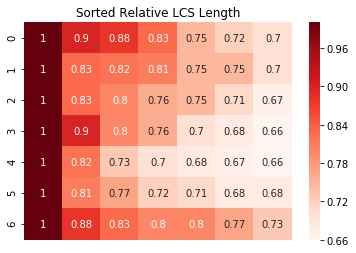

In [12]:
## sorting every rows and take mean 
    
sorted_relative_len = [sorted(relative_gene_matrix[i], reverse = True) for i in range(n_gene)]

heatmap = sns.heatmap(sorted_relative_len, annot = True, cmap = 'Reds')
plt.xticks([])
plt.title('Sorted Relative LCS Length')
plt.show()

             

In [13]:
# as the first pair is simply consists of the same node,
# the best connections are the 2nd, 3rd and 4th connection 
# in the sorted row


best_three_avg = np.zeros(n_gene)

for i in range(n_gene):
    best_three_avg[i] = np.mean(sorted_relative_len[i][1:4])
    print('String {}: Best three avg: {}'.format(i, best_three_avg[i].round(2)))

print("\nStrings sorted by their best-three-average: \n{}".format(np.argsort(-1*best_three_avg)))

String 0: Best three avg: 0.87
String 1: Best three avg: 0.82
String 2: Best three avg: 0.8
String 3: Best three avg: 0.82
String 4: Best three avg: 0.75
String 5: Best three avg: 0.77
String 6: Best three avg: 0.84

Strings sorted by their best-three-average: 
[0 6 1 3 2 5 4]


**Result**

- The highest 2 Strings are the **parent** Strings:
    * String 0
    * String 6
- The next one is the **grandparent** String:
    * String 1
- The lowest 4 Strings are the **child** Strings:
    * String 3
    * String 2
    * String 5
    * String 4

In [1]:
# !pip install binarytree


In [15]:
# printing the tree

from binarytree import build
# assuming that the sorted order represents 
# the level-order in the tree
level_order_values = [1,0,6,3,2,5,4]
tree = build(level_order_values)
print(tree)


    __1__
   /     \
  0       6
 / \     / \
3   2   5   4



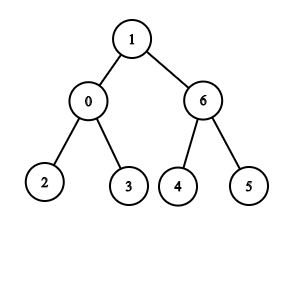

In [16]:
Image(filename='graph1.png')

#### Local Strategy 2

For this strategy, our assumptions and thought processes are the following:

- Every child-parent gene pair has the higher shared letters then any other pairs (i.e. grandparent-grandchild or uncle-niece or sibling)
- The direct ancestors/descendants (i.e. parent-child, grandparent-grandchild) connections are more stronger then any non-direct connection (i.e. uncle-niece, sibling, cousin, 2nd cousin etc.)
- As the root node has a direct connection with every other nodes, overall connections should be highest for the root nodes.
- The number of direct connection for every leave node is equal to the depth of the leave node as they don't have any downwards or same-level direct connection. Their only direct connections are the parents and grandparents up to the root node. So overall connection should be lowest for the leave nodes.
- The direct connections for the other nodes are higher then the leave nodes and lower than the root nodes. If they lies in more upper level, they should have more direct descendants and thus relatively higher overall connection.
- So considering all connection, the higher average value should indicate the lower depth of the node.

$\therefore$ If we take the average of all the connection of each node, the average should be highest for the root node (here, the grandparent) and it will be lowest for the leave nodes (here, the child nodes) and other node (the parents) will be in the middle.

##### Implementation:

1. Create the LCS length matrix, C for all the nodes 
2. As the lengths of the different pairs vary, more useful metric will be to use the ratio of the LCS length and the average length of the pairs. We can divide each LCS length by the average length of the corresponding pair to get the relative length.
3. Every string has one relative LCS length equal to 1, so it's not necessary to remove it. So we will take the average of all the relative LCS length for each of the strings.
4. If this total average of string $i$ is higher then string $j$, then the depth of the string $i$ is lower then the string $j$, which suggests:
    - The highest string will be the grandparent (root)
    - The lowest 4 strings will be 4 children
    - The remaining one will be the parents

In [17]:
## lcs length matrix
C

array([[52, 40, 41, 48, 39, 38, 45],
       [40, 54, 38, 38, 47, 44, 43],
       [41, 38, 47, 39, 36, 36, 39],
       [48, 38, 39, 55, 38, 37, 42],
       [39, 47, 36, 38, 60, 39, 40],
       [38, 44, 36, 37, 39, 54, 40],
       [45, 43, 39, 42, 40, 40, 50]])

In [18]:
## making the relative gene length matrix

# initialize with 0
relative_gene_matrix = np.zeros((n_gene, n_gene))


for i in range(n_gene):
    
    # the diagonals are always 1 as both are the same pair
    relative_gene_matrix[i,i] = 1
    
    # only calculate the upper diagonal and complete the lower
    # diagonal accordingly
    for j in range(i+1, n_gene):
        
        # realative length = LCS length/ mean string length
        mean = np.mean((C[i,i], C[j,j]))
        relative_gene_matrix[i,j] = (C[i,j]/mean).round(2)
        relative_gene_matrix[j,i] = relative_gene_matrix[i,j]

print(relative_gene_matrix)

[[1.   0.75 0.83 0.9  0.7  0.72 0.88]
 [0.75 1.   0.75 0.7  0.82 0.81 0.83]
 [0.83 0.75 1.   0.76 0.67 0.71 0.8 ]
 [0.9  0.7  0.76 1.   0.66 0.68 0.8 ]
 [0.7  0.82 0.67 0.66 1.   0.68 0.73]
 [0.72 0.81 0.71 0.68 0.68 1.   0.77]
 [0.88 0.83 0.8  0.8  0.73 0.77 1.  ]]


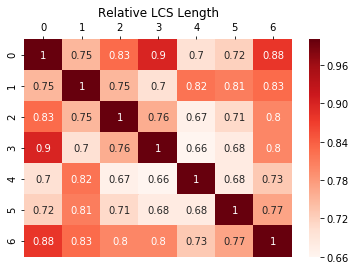

In [19]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns

heatmap = sns.heatmap(relative_gene_matrix, annot = True, cmap = 'Reds')
heatmap.xaxis.set_ticks_position('top') # show the ticks on top
plt.title('Relative LCS Length')
plt.show()

In [20]:
# the average of the all relative LCS length

avg = np.zeros(n_gene)

for i in range(n_gene):
    avg[i] = np.mean(sorted_relative_len[i])
    print('String {} Average: {}'.format(i, avg[i].round(3)))

print("\nStrings sorted by their average: \n{}".format(np.argsort(-1*avg)))

String 0 Average: 0.826
String 1 Average: 0.809
String 2 Average: 0.789
String 3 Average: 0.786
String 4 Average: 0.751
String 5 Average: 0.767
String 6 Average: 0.83

Strings sorted by their average: 
[6 0 1 2 3 5 4]


**Result**

- The highest average string is the **grandparent** string:
    * String 6
- The next 2 strings are the **parent** strings:
    * String 0
    * String 1
- The lowest 4 Strings are the **children** strings:
    * String 2
    * String 3
    * String 5
    * String 4

In [21]:
from binarytree import build
level_order_values = [6,0,1,2,3,5,4]
tree = build(level_order_values)
print(tree)


    __6__
   /     \
  0       1
 / \     / \
2   3   5   4



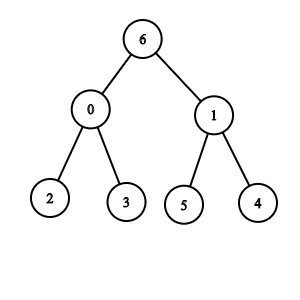

In [22]:
Image('graph2.png')

**Discussion and Limitation:**

One major limitation of both of the local strategy is that they just told us the levels of each nodes, i.e. either if it is a grandparent, parent or child.

But it doesn't tell us which nodes are connected with which nodes and how to build the whole tree. So in both cases in order to build the tree, we just assume that the output order (sorted by their 3-best-avg or total average) of the parents and the children are in level_order. But there is no implication from the strategy itself saying that the connected nodes are originally a parent-child node. For example, we cannot be sure that string 2 and string 3 is the children of string 0, not the string 1.

Now, both strategy gives different outcome, it means the assumptions of at least one of the strategy is not fulfilled in our tree. For further inspection, we can take help from the heatmap of the relative LCS length:

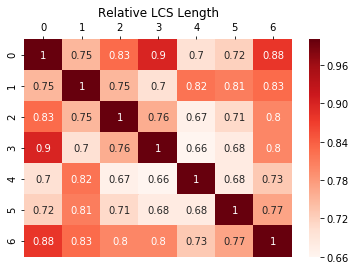

In [23]:
heatmap = sns.heatmap(relative_gene_matrix, annot = True, cmap = 'Reds')
heatmap.xaxis.set_ticks_position('top') # show the ticks on top
plt.title('Relative LCS Length')
plt.show()

In **local strategy 1**, from the assumption that the child-parent edge are the strongest, we predicted that the grandparent, parent and children should have 2, 3, and 1 strong connections respectively.

In the heat map, we can see that,
- string 0 and 1 have 3 strong connection, thus possibly the parent
- string 4 and 5 have 1 stronger connection, with string 1, so possibly they are the children of string 1

But,
- string 2 and 3 has 1 very strong connection with string 0, but also have a smaller strong connection with string 6
- string 6 has 4 relatively string connection, 2 most strong ones are with string 0 and string 1 and other 2 weak ones are with string 2 and 3

So we can induce that,
- string 2 and 3 are children of string 0, but also have a smaller strong connection with their grandparent string 6
- string 6 is the grandparent, parent of string 0 and 1, but also have a smaller strong connection with its grandchild string 2 and 3

So, we can conclude that,
- Our assumptions were correct that the parent-child pairs are stronger as 6-2 and 6-3 pairs were relatively weaker then any parent-child pair.
- But our implementation was not correct. We assumed that the average of the best 3 connections will reflect the number of strong connection of each node. But the 3rd relatively weaker connection of the grandparent (6-2 connection: 0.8) was significantly closer to the all three relatively stronger child-parent connection of one of the parent string 1 (0.82, 0.81 and 0.83).
- So that's why our strategy gave misleading answer and misclassified the root string 6 as a parent and the parent string 1 as the root node.

#### Global Strategy 1

For this strategy, our assumptions and thought processes are the following:

- Every child-parent gene pair has the higher shared letters then any other pairs (i.e. grandparent-grandchild or uncle-niece or sibling) thus stronger then all other pairs.
- There exist no non-parental pair, which is stronger then any parental pair in the whole tree.
- Due to random mutation, it might be possible that two different string can have a very strong similarity due to random chance. We are assuming that no such case exists in our gene string.
- So if we take the strongest pairs, they will always be parent-child pair.
- As every edge connects a node with its parent only except the root node. So if there is $n$ node in a gene tree, there will be exactly $n-1$ distinct edges.

$\therefore$ If we continue to add the stronger pairs as the edge of our graph until the number of edge reached $n-1$, where $n $ is the number of gene, we will end up having our desired geneological tree.

##### Implementation:

1. Create the LCS length matrix, C for all the nodes 
2. As the lengths of the different pairs vary, more useful metric will be to use the ratio of the LCS length and the average length of the pairs. We can divide each LCS length by the average length of the corresponding pair to get the relative length.
3. Make an empty graph.
4. As the diagonal of the relative length matrix has 1, representing same string twice, we can ignore them (i.e. make them 0). Also the matrix is symmetric, so we can work with only the upper triangular of the matrix (i.e. make every element below the diagonal 0).
5. Then find the most strong remaining pair (maximum number in the remaining matrix) and add the pair of string as an edge of the graph.
6. Change the value of the maximum relative length to -1.
7. Repeat step 5 and 6 until the number of distinct edge of the graph reached $n-1$

8. Draw the Graph:
    - The leave nodes will be the children 
    - The nodes connecting by two children will be the parents, they will have 3 total edge (2 to two child and 1 to the grandparent)
    - The nodes connecting by the two parents will the grandparent

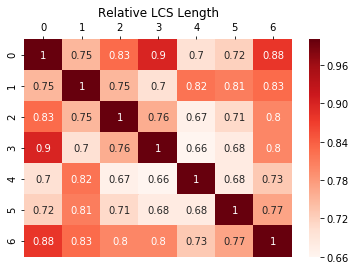

In [24]:
# relative_gene_matrix calculated as before

heatmap = sns.heatmap(relative_gene_matrix, annot = True, cmap = 'Reds')
heatmap.xaxis.set_ticks_position('top') # show the ticks on top
plt.title('Relative LCS Length')
plt.show()

In [25]:
# make an empty graph

import networkx as nx

G = nx.Graph()



In [26]:
# work with only the upper triangular matrix and make the diagonals and 
# entries below the diagonal to 0
upper_triangle = np.triu(relative_gene_matrix, 1)


# continue adding edges until # of edge = n_gene - 1
while(G.number_of_edges() < n_gene - 1):
    # finding the index of the maximum relative LCS length 
    # (i.e. the strongest pair)
    most_common = np.unravel_index(np.argmax(upper_triangle, axis=None), upper_triangle.shape)
    
    # add an edge between the strongly connected pair
    G.add_edge(most_common[0], most_common[1])
    
    # make the new value for the pair -1, so that we can 
    # find the next stronger pair
    upper_triangle[most_common] = -1


C:\Users\mahmu\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


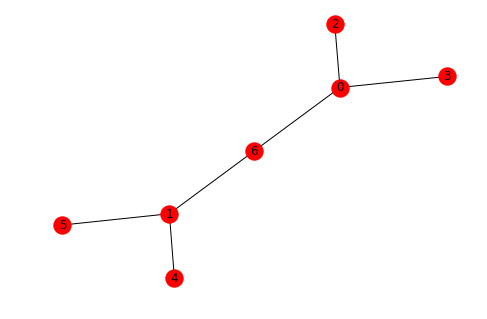

In [27]:
# Draw the graph
nx.draw(G, with_labels=True)

**Result**

- The leave nodes are the **children** strings:
    * String 4
    * String 5
    
    * String 2
    * String 3
- The 2 nodes connected by the children are the **parent** strings:
    * String 0 connected by string 2 and string 3
    * String 1 connected by string 4 and string 5
- The node connected by the parents is the **grandparent** string:
    * String 6 connected by string 0 and string 1

In [28]:
level_order_values = [6,0,1,2,3,4,5]
tree = build(level_order_values)
print(tree)


    __6__
   /     \
  0       1
 / \     / \
2   3   4   5



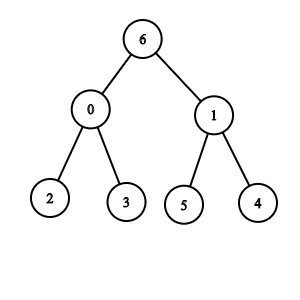

In [29]:
Image('graph2.png')

**Discussion:**

As expected, the global strategy tree was similar as the tree we found in local strategy 2 and also in the heat map analysis after the local strategies. 

The previous two strategy was local strategy as we didn't consider all the connection between all the nodes to build the tree. Instead we used the property of a single node (i.e. their average connection with other nodes or the average of their best-three connection) to build the tree.

But in this strategy, we used the overall best connections of the whole matrix and use them to build the edges of our graph.

The major advantage is that, we can found the exact pair-child nodes and thus build the correct tree.

So, among these three strategies, the global one has higher probability of giving the correct genealogy tree. As we see in earlier discussion, local strategy 1 can give wrong result if the best 3 average don't represent the number of strong connection. Local strategy should give the correct levels as long as the parent-child pair are the strongest but it cannot tell us which child is related to which parent.

## Genealogy Binary Tree

Write an algorithm in Python for the general case, which takes as input $N$ sequencing strings and outputs a genealogy binary tree associated with the $N$ strings that best exposes the relationships between them. You should test your algorithm by providing at least two simple test cases that demonstrate that your algorithmic implementation is correct. 

**Global Strategy**

We will implement the global strategy as it is better than other two strategies. But we will add some improvement to consider some of the special cases. Let's see the major initial assumptions again:

1. Every child-parent gene pair has the higher shared letters then any other pairs (i.e. grandparent-grandchild or uncle-niece or sibling) for a single string, thus stronger then all other pairs.
2. There exist no non-parental pair, which is stronger then any parental pair in the whole tree.
3. Due to random mutation, it might be possible that two different non-parental string can have a very strong similarity due to random chance. We are assuming that no such case exists in our gene string.

**1st improvement:**

This will consider the case, which will not satisfy the 2nd assumption.

Suppose, 
- 2 is a strongly connected child of 1 and 1 is a strongly connected child of 0. As both (0-1 and 0-2 parent-child pair) are strong, (0-2 grandparent-grandchild) has a relatively strong connection.
- 4 is weakly connected with its parent 3. So though (4-3 parent-child pair) is the strongest pair for string 4, this connection is weaker then (0-2 grandparent-grandchild) connection.

So, it breaks assumption 2 but holds assumption 1. So, when we will add the strongest edges one by one, we will add (0-2) before (4-3) and as the number of edge will become n-1, the tree will stop adding edge, thus return a wrong tree.

To resolve the problem,
- We will first add the strongest connection for EACH of the string.
- Then if still the number of edge is below n-1, we will continue adding the remaining strongest edge.

So, in this particular example, first considering all the strongest edge for each string, we will add (4-3) before (0-2) as the stronger edge for 0 and 2 are (0-1) and (2-1). So, even before adding (0-2) the number of edge will be n-1 and it will stop adding edges



**2nd Improvement:**

This will consider some of those case, which will break the 3rd and consequently the 1st assumption and give necessary warning.

If there exists a (or some) non-parental edge(s) which are more strong then parental node(s), then our strategy will connect them first. And as long as the number of edge will reach (n-1), it will stop adding any edge and return the graph. 

Then it is possible that we will miss one or more parental edge and get an unconnected graph. In an unconnected graph, even if we can identify which one is the potential non-parent edge, we cannot add the parts of the graph as we don't know which are the missing parental edge.

So, we will further check if all the strings of the tree are connected in a single tree. If not, we will show an warning stating that 'There exists some non-parent edge which are stronger then some parent edge'. Then we will continue adding edges until we have a full connected graph to ensure that we don't miss any parent edge. Having all nodes also allow for better understanding of potential non-parent node.

To understand the importance of this approach, consider the following tree:


In [30]:
values = [0,1,2,3,4,5,6]
tree = build(values)
print(tree)


    __0__
   /     \
  1       2
 / \     / \
3   4   5   6



If due to random mutation, (0-3) pair become strongly connected then (0-1) and (0-2), then one possible case is the following:

C:\Users\mahmu\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


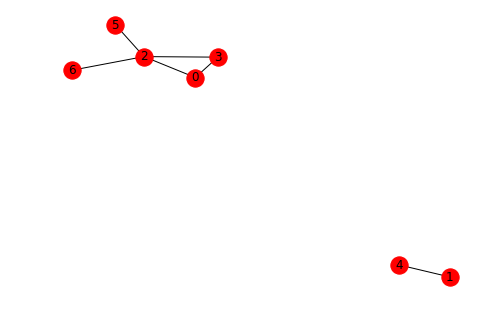

In [31]:
G = nx.Graph()

# adding the strong nodes for each string
G.add_edge(0,3)
G.add_edge(1,4)
G.add_edge(2,0)
G.add_edge(3,0)
G.add_edge(4,1)
G.add_edge(5,2)
G.add_edge(6,2)

# n_edge = 5
# n_node = 7

# we will add one remaining stronger edge
# As (0-3) is very strong and (2-0) is very strong, one possible case
G.add_edge(2,3)

nx.draw(G, with_labels =True)

Here, as (2-3-0) form a triangle, which cannot be possible in a genealogy tree, any of these 3 edges are potential non-parent edge. As we don't know how and with which whom, string 1 and 4 are related, it's not possible to apply the properties of a genealogy binary tree to determine the non-parent edge. 

C:\Users\mahmu\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


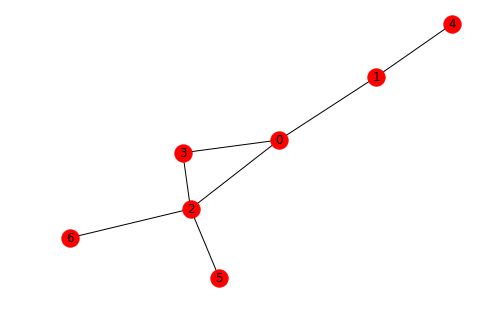

In [32]:
# now let's continue adding edge, until we get a connecting graph

G.add_edge(1,0)
nx.draw(G, with_labels = True)

Now, as we have the full tree, we can try removing one of the edges from the triangle and check if it still remains a valid tree.

- Removing (0-3):
    - 3, 5, 6 all are leave nodes and have one parent 2, but no string can have more than 2 child
    - So, not valid
- Removing (0-2):
    - parent of 5 and 6 is 2
    - parent of 4 is 1
    - parent of 1 is 0
    - parent of 2 and 0 is 3 (root)
    - So valid tree
    - Notice that there is now many different tree possible:
    
    $(5,6) > 2 > 3 > 0 > 1 > 4$ (root 4)
    
    $(5,6) > 2 > 3 > 0 < 1 < 4$(root 0)
    
    $(5,6) > 2 > 3 > 0 > 1 < 4$ (root 1)
    
- Removing (2-3):
    - parent of 5 and 6 is 2
    - parent of 4 is 1
    - parent of 3 and 2 is 0
    - parent of 0 is 1 (root)
 
So, due to the abnormal random mutation (which caused non-parent edge to be stronger), there is many valid genealogy tree depending on how we define a valid genealogy tree (i.e. 'no non-parental stronger edges' or 'root will be chosen to minimize max_depth' etc.).

Thus having a connecting tree allow the user to further investigate the tree better **if the tree has stronger non-parent edges.**

**Implement Python Code**

In [33]:
## as we will use relative LCS length
## let's make a function directly for that

def relative_lcs_len(x,y):
    """
    Returns the relative LCS length 
    
    Input:
    x,y :p pair of string
    
    Output:
    relative_len: relative LCS length
    """
    
    # lcs_length
    lcs_len = longest_common_subsequence(x,y)
    
    # divide by the average length
    relative_len = lcs_len/ ( (len(x)+len(y))/2 )
    
    return np.round(relative_len, 2)

In [34]:

def genealogy_tree(set_string, connected_tree = True):
    """
    Returns a genealogy tree from the given set of gene string
    
    Input:
    Set string: A list of N gene string
    connected_tree: Boolean: if 'True', the tree will continue adding edge
    until all the strings are connected. If 'False', return the tree when the edge 
    number equals (N-1). Default is True.
    
    
    Output:
    Tree: An undirected graph represents the genealogy tree of the given string
    
    Prints:
    - The heatmap showing the relative LCS length for all possible pairs
    - Draw the genealogy tree
    """
    
    # number if gene
    n_gene = len(set_string)


    
    ## making the relative gene length matrix

    # initialize with 0
    relative_gene_matrix = np.zeros((n_gene, n_gene))


    for i in range(n_gene):

        # the diagonals are always 1 as both are the same pair
        relative_gene_matrix[i,i] = 1

        # only calculate the upper diagonal and complete the lower
        # diagonal accordingly
        for j in range(i+1, n_gene):

            # realative length = LCS length/ mean string length
            relative_gene_matrix[i,j] = relative_lcs_len(set_string[i], set_string[j])
            relative_gene_matrix[j,i] = relative_gene_matrix[i,j]

    
    
    ### Visualize the relative LCS lenth
    heatmap = sns.heatmap(relative_gene_matrix, annot = True, cmap = 'Reds')
    heatmap.xaxis.set_ticks_position('top')
    plt.title('Relative LCS Length')
    plt.show()


    
    ### Make an empty graph
    G = nx.Graph()

    
    ### FInding the best connection for each string
    
    connection = relative_gene_matrix
    np.fill_diagonal(connection, 0) # change the diagonal to 0

    
    # go through each of the string
    for i in range(n_gene):
        # finding the index of the maximum relative LCS length 
        # for each string (strongest connection for each string)
        most_common = np.unravel_index(np.argmax(connection[i], axis=None), connection[i].shape)
        
        # add an edge between the string and its strongest pair
        G.add_edge(i, most_common[0])
        
        # make the new value for the pair -1, so that we don't
        # take this pair anymore
        connection[i][most_common[0]] = -1

        
    #### Finding any other missing child-parent connection if 
    ### the number of edge is less than (n-1)
    

    # taking only the upper triangle
    upper_triangle = np.triu(connection, 1)

    # continue adding edges until # of edge = n_gene - 1
    while(G.number_of_edges() < n_gene - 1):
        # finding the index of the maximum relative LCS length 
        # (i.e. the strongest pair)
        most_common = np.unravel_index(np.argmax(upper_triangle, axis=None), upper_triangle.shape)

        # add an edge between the strongly connected pair
        G.add_edge(most_common[0], most_common[1])

        # make the new value for the pair -1, so that we can 
        # find the next stronger pair
        upper_triangle[most_common] = -1

    
    
    if(connected_tree):
    
        #### If still all the strings are not connected, 
        ### continue adding the strongest edges until all are connected
        
        # warning is true before entering the while loop
        warning = True
        
        # continue until the connceted components has all the string
        while ( sorted(nx.connected_components(G), key=len, reverse=True)[0] != set(range(n_gene)) ):
            
            # show the warning only for the first time of the while loop
            if(warning == True):
                print("WARNING: The set of string has non-parental connection which are stronger then parental connection.")
                warning = False
            
            # finding the index of the maximum relative LCS length 
            # (i.e. the strongest pair) in the remaining matrix
            most_common = np.unravel_index(np.argmax(upper_triangle, axis=None), upper_triangle.shape)

            # add an edge between the strongly connected pair
            G.add_edge(most_common[0], most_common[1])

            print(most_common, upper_triangle[most_common])
            # make the new value for the pair -1, so that we can 
            # find the next stronger pair
            upper_triangle[most_common] = -1
        
    
    ### Draw the genealogy tree
    
    nx.draw(G, with_labels=True)
    plt.show()

    # return the tree
    return G


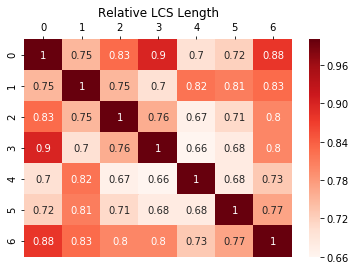

C:\Users\mahmu\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


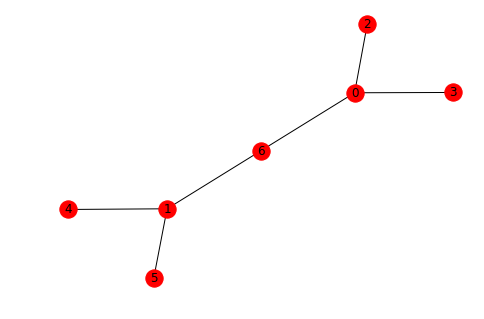

In [35]:
tree = genealogy_tree(set_string)

**Testing with different Gene strings:**

In [36]:
import random

def mutate_gene(gene, iteration=5):
    '''
    Returns a gene string after 'iteration' number of random mutation
    '''
    
    # convert to list
    gene_list = list(gene)
    
    for i in range(iteration):
        # choose random mutation site
        mutation_site = random.randint(0, len(gene_list) - 1)
        # randomly insert one of the 4 dna base
        gene_list[mutation_site] = random.choice(list('ATCG'))
    
    return ''.join(gene_list)

**Test 1**

In [37]:
new_gene_string = ['AGTTTATGTGTCAGAAGCAAAAGATTACTAATCTACGCGTCGCAAGGTCTATTCC']

# 0 is the parent of 1 and 2
for i in range(2): 
    new_gene_string.append(mutate_gene(new_gene_string[0]))

# 2 is the parent of 3 and 4
for i in range(2): 
    new_gene_string.append(mutate_gene(new_gene_string[2]))

# 1 is the parent of 5 and 6
for i in range(2): 
    new_gene_string.append(mutate_gene(new_gene_string[1]))

# 5 is the parent of 7 and 8 
for i in range(2):
    new_gene_string.append(mutate_gene(new_gene_string[5]))

new_gene_string

['AGTTTATGTGTCAGAAGCAAAAGATTACTAATCTACGCGTCGCAAGGTCTATTCC',
 'AGTTTATGTGTCTGAAGTAAAAGATTAGTAATCTACGCTTCGCAAGGTCTATTCC',
 'AGTTTATGTGTCAGAAGAAAAAGATAACTAATCTACGCGTAGCAAGGTCTATTCC',
 'AGTTTATGTGTCAGAAGAAAAAGATAACTAATCTACGCGTAGCAGGGTCTATGCC',
 'AGTTTATCTGGCAGCATAAAAAGATAACTAATCTACGCGTAGCAAGGTCTATTCC',
 'AGATTATGTGTCTGAAGTAAAGGATTAGTAATCTACGCTTAGCAAGGACTATTCC',
 'AGTTTATGTGTCTGAGGGAAAAGATTAGTAATCTACGCTTCGCAAGGTCTATTGC',
 'AGATCATATGACTGAAGTAAAGGATCAGTAATCTACGCTTAGCAAGGACTATTCC',
 'AGATTATGTGTCTGAAGTAAAGGATTAGTAATCTACGCTTAGTAAGGACTATACC']

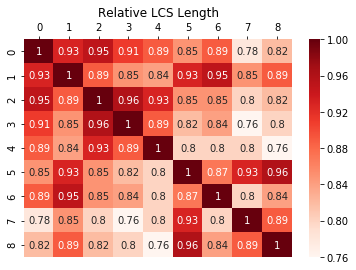

C:\Users\mahmu\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


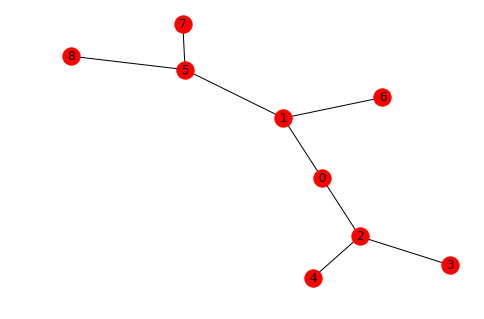

In [38]:
tree1 = genealogy_tree(new_gene_string)

**Test 2**

In [39]:
new_gene_string = ['AGTTTATGTGTCAGAAGCAAAAGATTACTAATCTACGCGTCGCAAGGTCTATTCC']

# 0 is the parent of 1 and 2
for i in range(2): 
    new_gene_string.append(mutate_gene(new_gene_string[0]))

# 1 is the parent of 3 and 4
for i in range(2): 
    new_gene_string.append(mutate_gene(new_gene_string[1]))

# 2 is the parent of 5 and 6
for i in range(2): 
    new_gene_string.append(mutate_gene(new_gene_string[2]))

# 5 is the parent of 7
for i in range(1):
    new_gene_string.append(mutate_gene(new_gene_string[5]))

# 4 is the parent of 8
for i in range(1):
    new_gene_string.append(mutate_gene(new_gene_string[4]))

# 3 is the parent of 9 and 10
for i in range(2):
    new_gene_string.append(mutate_gene(new_gene_string[3]))
    
new_gene_string

['AGTTTATGTGTCAGAAGCAAAAGATTACTAATCTACGCGTCGCAAGGTCTATTCC',
 'CGTTTATGTGTCAGAAGCAAAAGATTACTAATCTATTCGTCGCAAGGTCTATTCC',
 'AGTTGATGTGTCACTAGCCTAAGATTACTAATCTACGCGTCGCAAGGTCTATTCC',
 'CGGTTATGTGTCCGAAGCACAAGATTACTAATCTATTCGTCGCAAGGTCTATTCC',
 'CGTTTATGTGTCAGAAGCAAAAGATTACTAATCTCATCGTCGCAAGCGCTATTCC',
 'AGTTGATGTGTCACTAGCCTAAGATTACTAATCTACGCGTCGCAAGGGCTTTTCC',
 'AGTTGCTGTGTCACTAGCCTAAGATTACTTTTCTACGCGTCGCAAGGTCTATCCC',
 'AGTTGATATGCCACTAGCCTAAGATTACTAATCTATGCGTCGCAAGGGCTCTTCC',
 'CGTTGATGAGTCAGAAGGAAAAGATTACTGATCTAATCGTCGCAAGCGCTATTCC',
 'CGGTTATGTGTCCGAAGCAAAAGACTACTAATCTATTCGTCACAAGTTCTAATCC',
 'CGGTTATGTGTCCGCAGCACAAGATTACTAACCTCTTCGTCGCAAGGTATATACC']

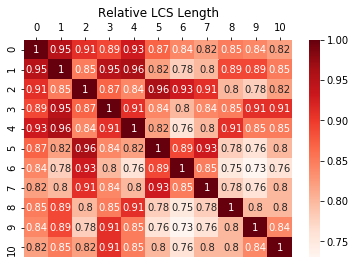

(2, 6) 0.93
(5, 7) 0.93
(0, 2) 0.91


C:\Users\mahmu\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


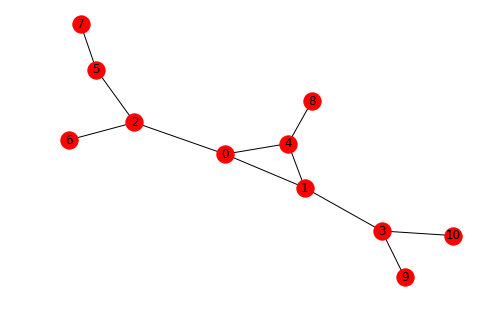

In [40]:
tree2 = genealogy_tree(new_gene_string)

## Computational Critique

Strengths or weaknesses of our suggested algorithm and possible improvements.

**Strength**

**1.**

I used greedy strategy in our main algorithm. The greedy strategy is that we will choose the current best strong edge from the matrix, add the edge and change the value of that strong edge to find the next best edge.

It is an optimizing  problem as we want to maximize the LCS connection between the edges of our genealogy tree.

It has the optimal substructure, as if we have a optimal tree with N string and then want to another string, we can simply find the string which has the maximum relative LCS length (i.e. strongest edge) with the new string and add that new edge to the previous optimal tree to build our new optimal genealogy tree.

In this algorithm, we are not using the 'overlapping subproblem' as we are just choosing the strongest edge without considering any property of the optimal tree for the subproblems (i.e. the optimal tree for smaller number of gene string). This is why it is a greedy algorithm and not dynamic programming.

Now, our greedy approach will give us optimal result as long as the set of string holds our assumption that no non-parental string is stronger then the parental string for a specific node. We discussed in task 5 how our approach is right as we will add all the parental edges (as we are adding the stronger ones) until we reach the maximum number of edge (n-1). There is (n-1) parental string and as from our assumptions all of them are stronger then other edges, we will always choose only the parental nodes.

**2.**

I used the relative_LCS_len function in our algorithm, which is based on the longest common sequence function. In longest common sequence function, we used dynamic programming to efficiently calculate the length of the LCS for two different pair of string. 

LCS length is an optimizing problem as we want to maximize the length of the common subsequence between the pair (suppose the pair is x and y).

It has the optimal substructure. If we know the length of the LCS for $x[:i]$ and $y[:j]$, then just by checking the $x[i]$ and $y[j]$, we can find the LCS length for $x[i+1]$ and $y[j+1]$ as if they are equal the length will increase by 1, if not the length will be maximum between LCS of $(x[i],y[i+1])$ and $(x[i+1], y[i])$.

As we saw in the last paragraph, we can use recursive function to find the maximum LCS length using a bottom-up approach, where we will use the maximum LCS length of the smaller subproblems. So it also has the 'overlapping subproblem', that's why we can use a table to memoize the optimal value of subproblem and use them to build up the optimal value for the full problem (i.e. longest LCS length).

Use of DP, make the program more efficient and fast as we are just filling up the table, where in naive approach, we need to check all possible subsequence of x and y.

3. I used relative LCS length instead of absolute LCS length. As we have strings with different length, comparing the absolute value will mislead us, so better metric will be to compare how much percentage of their average length is common between them.

4. While building relative_gene_matrix, we know the diagonals will be simply 1 as the string is pairing with itself and also the matrix is symmetric. So, I didn't calculate the diagonals and also not for the lower triangular to avoid unnecessary computation.

5. The output of the function is a graph, where it clearly identifies the parental edges and draw the graph before ending the function. This allows us to directly visualize the genealogy tree and find its all connected edges. As the graph is labeled, it clearly shows which strings are connected with which strings.

6. It also prints the relative LCS length matrix as a matrix to show the strength of all possible edges, it also allow us to further investigate the edges if we found any problem in our tree (i.e. non-parent edges are stronger than parental edges).

**Limitation**

1. One major limitation is our algorithm doesn't output the levels (i.e. parent, child, generation 1, 2 etc.) of each string, it just outputs the graph. So a visual inspection is needed to classify which one is parent, grandparent and the child node.

2. Similarly the graph is not a binary tree nor a directed graph, rather it is an undirected graph. So it is not always intuitive and visually explicit that which node is the root of the tree and which are the parents. The level of each nodes (strings) are also not visually explicit. One good strategy is to start from the leave nodes and finding their parents and go to the higher levels. But it can be a bit hard for someone who don't know or use this strategy to find the root, child and parents of the tree.

3. As we discussed in task 5, the correctness of the algorithm lies on the assumption that no random mutation can cause a stronger non-parental edges then a parental edges. As mutation is random, there is a chance that it could be happen, which will make our greedy strategy (strongest edge = parental edge) not optimized. That could lead a wrong genealogy tree. Although this algorithm can give a warning and continue adding the edges to make a connected graph, it cannot detect the exact non-parental strong edge and can return an invalid genealogy tree (i.e. one parent has 3 children etc.)

4. When the assumption fails, in order to make a connected graph, we will continue adding edges and in worst possible case, we may need to add all the edges remaining. This will make our graph worse and also decrease the efficiency of the program.

**Improvement**

1. One major area to improve is to make the output more efficient. Instead of just returning an undirected graph, it will be better, if we can make a binary tree and add the strings based on their strongest edges and return the root of the node. Having a binary tree data structure as an output will allow us to invest the tree further more easily. For example, we can then easily find the nodes at each level, the height of the tree, the directed edges of the tree etc.

2. It will be useful, if we can still make a genealogy tree, when our first assumption is not satisfied. If we can identify which edge(s) are the potential non-parent edges (i.e. form a triangle in the tree), we can try to delete one of them at a time and find the max_depth of the remaining tree. Then we can finalize the tree by removing the edge which ensure the lowest height of the tree.

## Complexity Analysis

Computational complexity of our solution to produce genealogy binary trees. 

Let denote $M$ to be the length of a gene, and $N$ the number of genes.

**Time Complexity**

Let's consider the complexity of each part of our algorithm one by one.

1. creating the relative gene matrix:

Here, we use the relative_lcs_len function which used the function longest_common_sequence. In the longest_common_sequence function, we used dynamic programming and recursively find the LCS length. We made a $m \times n$ matrix and fill the value of each element of the table and return the last row last column value. As to store one element, we just checked if $x[i] == y[j]$, which is $O(1)$, the filling out of the full table has the complexity $O(mn)$, where m and n are the length of the string.

Here given, that the length of a gene is $M$. So complexity of longest_common_sequence, $O(M^2)$.

relative_lcs_len used longest_common_sequence once, so it also has complexity $O(M^2)$.

While creating the relative gene matrix, we need to fill in the $N\times N$ matrix, where $N$ is the number of genes in the string. To fill a single element we used relative_lcs_len of $O(M^2)$.

So, total complexity, $O(N^2 M^2)$


2. Adding edges to the graph

To find the strongest edge, we used np.argmax() function. It go through the every column and every edge to find the maximum number and return its index, so its complexity is $O(N^2)$. Then np.unravel convert the flatten index in the shape of the matrix in constant time, O(1).

Now now we need to check how many times we want np.argmax to work or how many edges we want to add in the graph.

Firstly, we add stronger edge of each of the string, means N edge total.

Then, we take the upper triangle matrix and find the remaining stronger edges until the distinct edge number equals N-1. In worst case, we can assume among the edge added first time (N-2) was in the lower triangle, thus we are taking these (N-2) again and then take one last one. So in worst case it will be O(n) choice again.

3rd, **only if we don't have a connected graph yet and connected_graph = True,** we will add more edges. In worst case we will add all the remaining edges of the matrix, thus $O(N^2)$ edge.

Together, we can say, at the worst possible case, the number of edge need to add will be  $O(N^2)$

As adding each edge takes $O(N^2)$

Total complexity $O(N^4)$

Adding both of them together, complexity = $O(N^2 M^2 + N^4)$

Now $N$ is the number of string and $M$ is the number of letters in gene. So, when $M > N \Rightarrow M^2 > N^2$, our complexity will be $O(N^2 M^2)$. 

But if $M < N \Rightarrow M^2 < N^2$, our complexity in the worst possible case will be $O(N^4)$. If we surely know that $M < N\Rightarrow M^2 < N$, we can make the argument 'connected_graph' = False, then the complexity for adding the edge will be $O(N^3)$, thus the total complexity will be $O(N^3).$

**Space Complexity:**

We are using a $NxN$ matrix to store the relative LCS length.

Then for finding each LCS length, we are using a $MxM$ matrix. But we don't need all the lcs to be counted at the same time. So we can reuse the $MxM$ table to calculate LCS of another pair after storing one lcs length in the $NxN$ table. 

So, our space complexity is $O(M^2 + N^2)$



## Mutation Probabilities

How would you estimate the probabilities of insertions, deletions, and mutations, $p_i$, $p_d$, and $p_c$, respectively? (Hint: It is obvious that you don’t have enough data to obtain meaningful estimates for large datasets, but this small dataset has enough information for you to intuitively formulate estimates for $p_i$, $p_d$, and $p_c$.) Make sure you include a working Python estimation that would take your algorithmic strategy into practice. If you obtain estimates for these probabilities, please critically assess the results you obtained. 


Assumptions:

1. If the len(parent) > len(child), the extra letters are deleted from parent, thus n(deletion) = len(parent) - len(child) 
2. If the len(parent) < len(child), the extra letters are inserted to the parent, thus n(insertion) = len(child) - len(parent)
3. All other change in parent and child are caused by changed mutation

In [74]:
def mutation_rate(x,y):
    """
    Returns the 3 mutation rate (insertion, deletion and changing) 
    for a single pair of gene
    
    Inputs: 
    x = parent gene
    y = child gene
    
    Outputs:
    List: prob = a 3 element array containing the probability of 
    insertion, deletion and changing mutation respectively
    """
    
    # length of the LCS
    lcs_len = longest_common_subsequence(x,y)
    
    if(len(x) >= len(y)):
        insert = 0
        delete = len(x) - len(y)
        # find the elements which are exactly matched
        match = sum(np.array(list(x[:len(y)])) == np.array(list(y)))
        changing = len(y) - match
    
    else: 
        delete = 0
        insert = len(y) - len(x)
        # find the elements which are exactly matched
        match = sum(np.array(list(x)) == np.array(list(y[:len(x)])))
        changing = len(x) - match
    
    prob = [insert/len(x), delete/len(x), changing/len(x)]
    
    return prob

**Improvement 1**

In last cell, we are assuming all the remaining changes are by mutation, but by insert or delete letter from the inside of the gene, we can shift it forward or backwards, thus insertion/deletion can be more efficient then only mutation.

So, our assumptions now:

1. We delete the necessary letters from the parent string to create the LCS: n(deletion) = len(parent) - len(lcs)
2. Then we insert new letters into LCS to create the child string: n(insertion) = len(parent) - len(lcs)
3. We compare the total number of mutation in this method and the last method and take the minimum one.

In [78]:
def mutation_rate_2(x,y):
    """
    Returns the 3 mutation rate (insertion, deletion and changing) 
    for a single pair of gene
    
    Inputs: 
    x = parent gene
    y = child gene
    
    Outputs:
    List: prob = a 3 element array containing the probability of 
    insertion, deletion and changing mutation respectively
    """
    
    # length of the LCS
    lcs_len = longest_common_subsequence(x,y)
    
    
    ## Method 1
    
    if(len(x) >= len(y)):
        insert1 = 0
        delete1 = len(x) - len(y)
        # find the elements which are exactly matched
        match = sum(np.array(list(x[:len(y)])) == np.array(list(y)))
        changing1 = len(y) - match
    
    else: 
        delete1 = 0
        insert1 = len(y) - len(x)
        # find the elements which are exactly matched
        match = sum(np.array(list(x)) == np.array(list(y[:len(x)])))
        changing1 = len(x) - match
        
    ## Method 2
    
    delete2 = len(x) - lcs_len
    insert2 = len(y) - lcs_len
    
    if(delete1 + insert1 + changing1 <= delete2 + insert2):
        delete = delete1
        insert = insert1
        changing = changing1
    else:
        delete = delete2
        insert = insert2
        changing = 0
    
    prob = [insert/len(x), delete/len(x), changing/len(x)]
    
    return prob

**Improvement 2:**

In method 2, we are ignoring the changed mutation completely. But an optimal way to mutate a string to another will contain insert/delete/changed all together. So, we will use the idea of 'edit_distance': the minimum number of operation needed for changing one string to another. 

We will use dynamic programming, where we will have a mxn table A (where, m = len(x), n = len(y)), where $A_{i,j}$ entry will give the edit_distance to change $x[:i]$ to $y[:j]$

In [89]:
def edit_distance(x,y):
    """
    Returns the edit_distance_table A, where A_{i,j} entry 
    will give the edit_distance to change x[:i] to y[:j]
    """
    
    # intitialize an empty table 
    A = np.zeros((len(x)+1, len(y)+1))
  
    # first row represents edit_distance of x[:0] and y[:j],
    # so we will just insert the letters of y in an empty string
    A[0] = np.array(range(len(y)+1))
    
      
    # first column represents edit_distance of x[:0] and y[:j],
    # so we will just insert the letters of y in an empty string
    A[:,0] = np.array(range(len(x)+1))
    
    # go through the every element of x and y 
    for i in range(1, len(x)+1): 
        for j in range(1, len(y) + 1):  
  
            # If last letters are same, edit distance will stay the same 
            if x[i-1] == y[j-1]: 
                A[i][j] = A[i-1][j-1] 
  
            # If last letters are different, consider all three possibilities
            # and take the minimal cost
            else: 
                A[i][j] = 1 + min(A[i][j-1],        # Insertion mutation 
                                   A[i-1][j],        # Deletion mutation
                                   A[i-1][j-1])    # Changed mutation
  
    return A

In [91]:
print(edit_distance(a,b))

[[ 0.  1.  2. ... 52. 53. 54.]
 [ 1.  0.  1. ... 51. 52. 53.]
 [ 2.  1.  1. ... 50. 51. 52.]
 ...
 [50. 49. 48. ... 17. 18. 19.]
 [51. 50. 49. ... 18. 17. 18.]
 [52. 51. 50. ... 19. 18. 17.]]


Now we will use the edit_distance table to understand the minimum number of mutation.

1. We will start from the last character of both string.
2. If the letters are same, we will ignore and go back one letter behind for both of them
3. Otherwise, we will check which entry has a value less then 1: 
    - If the 'NW' has 1 less value, it is 'changed mutation'
    - If the 'N' has 1 less value, it is 'deletion mutation'
    - If the 'W' has 1 less value, it is 'insertion mutation'

In [95]:
def mutation_rate_3(x,y):
    """
    Returns the 3 mutation rate (insertion, deletion and changing) 
    for a single pair of gene
    
    Inputs: 
    x = parent gene
    y = child gene
    
    Outputs:
    List: prob = a 3 element array containing the probability of 
    insertion, deletion and changing mutation respectively
    """
    
    i = len(x)
    j = len(y)
    insert = 0   
    delete = 0  
    changing = 0  
    
    A = edit_distance(x,y)
    
    while i > 0 and j > 0:
        # If the letters are same, we will ignore and go back one letter behind for both of them
        if x[i - 1] == y[j - 1]:
            i -= 1
            j -= 1
 
        else:  
            decreased_value = A[i][j] - 1
            # If the 'NW' has 1 less value, it is 'changed mutation'
            if decreased_value == A[i - 1][j - 1]:  
                changing += 1
                i -= 1
                j -= 1
            
            # If the 'W' has 1 less value, it is 'insertion mutation'
            elif decreased_value == A[i][j - 1]:    
                insert += 1
                j -= 1
            
            # Otherwise, if the 'N' has 1 less value, it is 'deletion mutation'
            else:                                     
                delete += 1
                i -= 1
                
    prob = [insert/len(x), delete/len(x), changing/len(x)]
    
    return prob

In [96]:
# testing
mutation_rate_3(a,b)

[0.057692307692307696, 0.038461538461538464, 0.21153846153846154]

In [97]:
def total_mutation_rate(set_string, edge_list):
    """
    Returns the total mutation rate of a geneology tree
    
    Input:
    set_string = list of all the genes
    edge_list = list of edges (x,y), where x=parent and y=child 
    
    Output:
    
    """
    prob = np.zeros(3)
    
    for edge in edge_list:
        x, y = set_string[edge[0]], set_string[edge[1]]
        
        prob += np.array(mutation_rate_3(x,y))
    
    return prob/len(edge_list)

In [98]:
def edgelist(tree):
    '''
    Returns a directed edge_list from a binarytree
    '''
    
    edges = []
    
    for node in tree.levelorder:
        
        if node.left:
            edges.append((node.value, node.left.value))
        if node.right:
            edges.append((node.value, node.right.value))
                
    return edges

In [99]:
# our set_string
gene_tree_values = [6,0,1,2,3,4,5]
tree = build(gene_tree_values)
print(tree)



    __6__
   /     \
  0       1
 / \     / \
2   3   4   5



In [100]:
edge_list = edgelist(tree)
edge_list

[(6, 0), (6, 1), (0, 2), (0, 3), (1, 4), (1, 5)]

In [101]:
prob = total_mutation_rate(set_string, edge_list).round(4)

# printing the total mutation rate
print('\nMutation Probabilities: \nInsertion: {}%, \nDeletion: {}%, \nChanged: {}%'
      .format(prob[0]*100, prob[1]*100, prob[2]*100))


Mutation Probabilities: 
Insertion: 7.01%, 
Deletion: 4.130000000000001%, 
Changed: 10.59%


**HC Appendix:**

#strategize: In Task 5, I analyzed the advantages, limitations, strength and weakness of each of the strategy, then chose the optimal strategy to implement in python. Again discussed it's limitations, improvements, thought process and assumptions behind the strategy and finally discussed possible future improvements.

#designthinking: I used iterative process and build my new works upon my previous work. From the local strategy 1, I build up 2, then the heatmap analysis gave the basis of global strategy. Then I also tried to improve over the assumptions and detailed the future improvements.

#communicationdesign: I used heatmap, binarytree, networkx graph, hand-drawn graph efficiently with appropriate color and labeling to ensure that it supports my codes, discussion and algorithms.

#breakitdown: I broke the problems in tractable subproblems and complete and discussed one by one the subproblems. In Task 5, I explained my assumptions, thought process and work on each one of them to build up new work.